<a href="https://colab.research.google.com/github/VitalZH/-18.-REST-requests.-API-/blob/main/Vacancy_HH_parce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Failed to retrieve data from https://api.hh.ru/vacancies?page=20&per_page=100
Roles Count: 
 {'Другое': 219, 'Менеджер по продажам, менеджер по работе с клиентами': 83, 'Гейм-дизайнер': 3, 'Учитель, преподаватель, педагог': 22, 'Бухгалтер': 152, 'Программист, разработчик': 66, 'Водитель': 212, 'Охранник': 47, 'Специалист по подбору персонала': 3, 'Операционный директор (COO)': 16, 'Администратор': 123, 'Продавец-консультант, продавец-кассир': 53, 'Упаковщик, комплектовщик': 31, 'Оператор call-центра, специалист контактного центра': 26, 'SMM-менеджер, контент-менеджер': 20, 'Специалист по сертификации': 1, 'Руководитель филиала': 15, 'Диспетчер': 14, 'Торговый представитель': 10, 'Артист, актер, аниматор': 2, 'Event-менеджер': 6, 'Генеральный директор, исполнительный директор (CEO)': 29, 'Фотограф, ретушер': 6, 'Начальник производства': 11, 'Руководитель проек

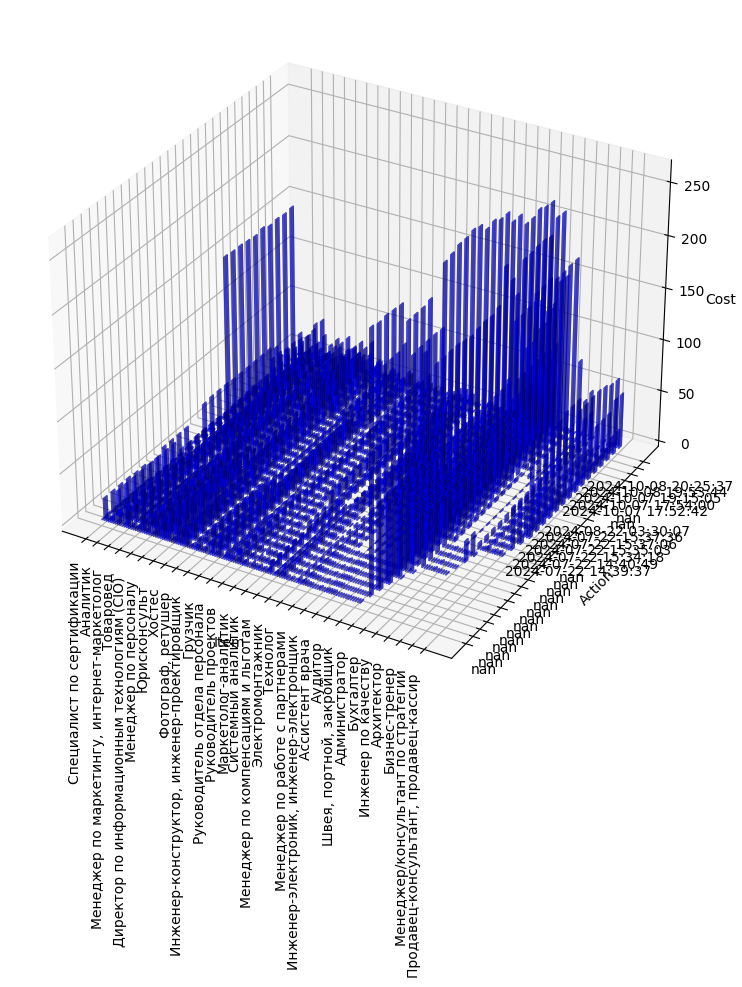

In [ ]:
# ДЗ урок 18. REST запросы с requests. Работа с API
# ____Часть1: парсинг сайта hh.ru + сохранение данныз в CSV на гугл диск
from google.colab import drive
import requests
import pandas as pd
import datetime
import os

#для второй части
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Подключаем Google Drive
drive.mount('/content/drive')

def extract_responsibilities(url):
    responsibilities = {}
    roles_count = {}
    page = 0
    per_page = 100

    while True:
        api_url = f"{url}?page={page}&per_page={per_page}"
        response = requests.get(api_url)

        if response.status_code != 200:
            print(f"Failed to retrieve data from {api_url}")
            break

        data = response.json()
        items = data.get("items", [])

        for item in items:
            professional_roles = item.get("professional_roles", {})
            roles_name = professional_roles[0]["name"]

            if roles_name in roles_count:
                roles_count[roles_name] += 1
            else:
                roles_count[roles_name] = 1

        if page >= data["pages"]:
            break
        page += 1

    # Save roles_count to 'data_from_hh.csv' including timestamp
    save_to_csv('/content/drive/My Drive/УИИ_ноутбуки+мои_тесты/data_from_hh.csv', roles_count)

    return responsibilities, roles_count

def save_to_csv(file_path, data):
    # Добавляем текущую дату и время в новый столбец DATA
    current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    data['DATA'] = current_time  # Создаем новый столбец DATA с текущей датой и временем

    df = pd.DataFrame(data, index=[0])

    if os.path.exists(file_path):
        existing_df = pd.read_csv(file_path, index_col=0)
        df = pd.concat([existing_df, df], ignore_index=True)

    df.to_csv(file_path, index=False)

url = 'https://api.hh.ru/vacancies'
responsibilities, roles_count = extract_responsibilities(url)
print('Roles Count: \n', roles_count)

#____ Часть2: 3Д график ____
# Читаем данные из CSV файла на Google Drive
data = pd.read_csv('/content/drive/My Drive/УИИ_ноутбуки+мои_тесты/data_from_hh.csv')

# Определяем индекс столбца DATA
data_column_index = next((i for i, col in enumerate(data.columns) if col == 'DATA'), None)

if data_column_index is None:
    raise ValueError("Столбец 'DATA' не найден в данных.")

# Извлекаем данные для 3D bar диаграммы
actions = data[data.columns[data_column_index]].tolist()  # Столбец DATA для меток по оси Y
costs = data.iloc[:, :data_column_index].values.tolist()  # Все столбцы до DATA

# Создаем 3D фигуру
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Создаем 3D bar диаграмму
for i, action in enumerate(actions):
    for j in range(len(costs[i])):
        ax.bar3d(j, i, 0, 0.5, 0.5, costs[i][j], color='b', alpha=0.5)

# Каждое 5-е название
ax.set_xlabel('Item')
ax.set_xticks(range(0, len(costs[0]), 5))  # Устанавливаем тики на каждом пятом значении
ax.set_xticklabels(data.columns[::5][:len(costs[0]) // 5 + 1], rotation=90)  # Метки для оси X

ax.set_ylabel('Action')
ax.set_yticks(range(len(actions)))
ax.set_yticklabels(actions)

ax.set_zlabel('Cost')

# Показываем диаграмму
plt.show()


Парсинг ВСЕХ актуальных вакансий из НН.ру https://api.hh.ru/vacancies

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


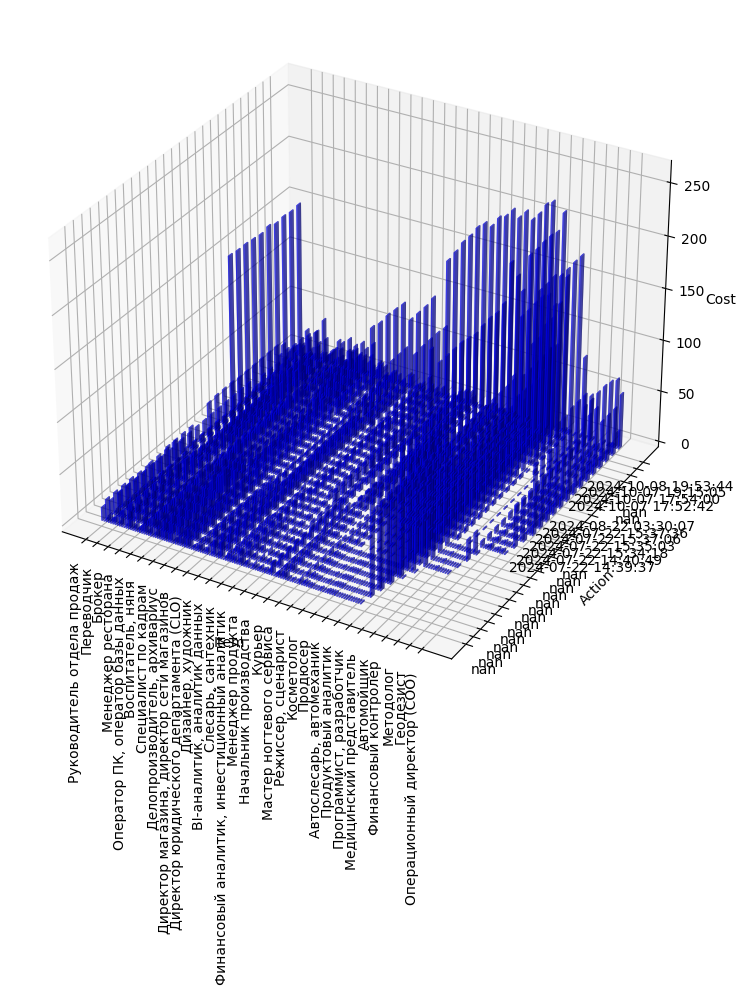

In [ ]:
# РАБОТАЕТ Строит 3д график по данным из CSV c DATA
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Подключаем Google Drive
drive.mount('/content/drive')

# Читаем данные из CSV файла на Google Drive
data = pd.read_csv('/content/drive/My Drive/УИИ_ноутбуки+мои_тесты/data_from_hh.csv')

# Определяем индекс столбца DATA
data_column_index = next((i for i, col in enumerate(data.columns) if col == 'DATA'), None)

if data_column_index is None:
    raise ValueError("Столбец 'DATA' не найден в данных.")

# Извлекаем данные для 3D bar диаграммы
actions = data[data.columns[data_column_index]].tolist()  # Столбец DATA для меток по оси Y
costs = data.iloc[:, :data_column_index].values.tolist()  # Все столбцы до DATA

# Создаем 3D фигуру
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Создаем 3D bar диаграмму
for i, action in enumerate(actions):
    for j in range(len(costs[i])):
        ax.bar3d(j, i, 0, 0.5, 0.5, costs[i][j], color='b', alpha=0.5)

# Устанавливаем метки и тики для осей
'''
Рабочий код ВСЕ названия
ax.set_xlabel('Item')
ax.set_xticks(range(len(costs[0])))  # Устанавливаем тики по количеству столбцов до DATA
ax.set_xticklabels(data.columns[:data_column_index].tolist(), rotation=90)  # Метки для оси X
'''

# Каждое 5-е название
ax.set_xlabel('Item')
ax.set_xticks(range(0, len(costs[0]), 5))  # Устанавливаем тики на каждом пятом значении
ax.set_xticklabels(data.columns[::5][:len(costs[0]) // 5 + 1], rotation=90)  # Метки для оси X

ax.set_ylabel('Action')
ax.set_yticks(range(len(actions)))
ax.set_yticklabels(actions)

ax.set_zlabel('Cost')

# Показываем диаграмму
plt.show()


In [ ]:
# РАБОЧИЙ сохраняем данные на гугл драйв + дата
from google.colab import drive
import requests
import pandas as pd
import datetime
import os

def extract_responsibilities(url):
    responsibilities = {}
    roles_count = {}
    page = 0
    per_page = 100

    while True:
        api_url = f"{url}?page={page}&per_page={per_page}"
        response = requests.get(api_url)

        if response.status_code != 200:
            print(f"Failed to retrieve data from {api_url}")
            break

        data = response.json()
        items = data.get("items", [])

        for item in items:
            professional_roles = item.get("professional_roles", {})
            roles_name = professional_roles[0]["name"]

            if roles_name in roles_count:
                roles_count[roles_name] += 1
            else:
                roles_count[roles_name] = 1

        if page >= data["pages"]:
            break
        page += 1

    # Save roles_count to 'data_from_hh.csv' including timestamp
    save_to_csv('/content/drive/My Drive/УИИ_ноутбуки+мои_тесты/data_from_hh.csv', roles_count)

    return responsibilities, roles_count

def save_to_csv(file_path, data):
    # Добавляем текущую дату и время в новый столбец DATA
    current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    data['DATA'] = current_time  # Создаем новый столбец DATA с текущей датой и временем

    df = pd.DataFrame(data, index=[0])

    if os.path.exists(file_path):
        existing_df = pd.read_csv(file_path, index_col=0)
        df = pd.concat([existing_df, df], ignore_index=True)

    df.to_csv(file_path, index=False)

# Подключаем Google Drive
drive.mount('/content/drive')

url = 'https://api.hh.ru/vacancies'
responsibilities, roles_count = extract_responsibilities(url)
print('Roles Count: \n', roles_count)

Mounted at /content/drive
Failed to retrieve data from https://api.hh.ru/vacancies?page=20&per_page=100
Roles Count: 
 {'Другое': 220, 'Менеджер по продажам, менеджер по работе с клиентами': 83, 'Гейм-дизайнер': 3, 'Учитель, преподаватель, педагог': 22, 'Бухгалтер': 153, 'Программист, разработчик': 68, 'Водитель': 213, 'Охранник': 44, 'Специалист по подбору персонала': 4, 'Операционный директор (COO)': 16, 'Администратор': 122, 'Продавец-консультант, продавец-кассир': 54, 'Упаковщик, комплектовщик': 31, 'Оператор call-центра, специалист контактного центра': 24, 'SMM-менеджер, контент-менеджер': 19, 'Специалист по сертификации': 1, 'Руководитель филиала': 15, 'Торговый представитель': 10, 'Диспетчер': 14, 'Артист, актер, аниматор': 2, 'Генеральный директор, исполнительный директор (CEO)': 28, 'Руководитель проектов': 16, 'Event-менеджер': 6, 'Начальник производства': 11, 'Фотограф, ретушер': 6, 'Лаборант': 4, 'Мастер по ремонту оборудования, техники': 2, 'Бортпроводник': 7, 'Офис-менедж